In [2]:
#data='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
#!wget $data

--2022-09-14 10:07:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv'

     0K .......... .......... .......... .......... ..........  3% 1.74M 1s
    50K .......... .......... .......... .......... ..........  7% 3.42M 1s
   100K .......... .......... .......... .......... .......... 10% 3.26M 0s
   150K .......... .......... .......... .......... .......... 14% 2.85M 0s
   200K .......... .......... .......... .......... .......... 17% 6.35M 0s
   250K .......... .......... .......... .......... .......... 21% 4.54M 0s
   300K .......... .......... .......... .......... .......... 25% 6.50M 0s
   350K .......... .......... ..

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

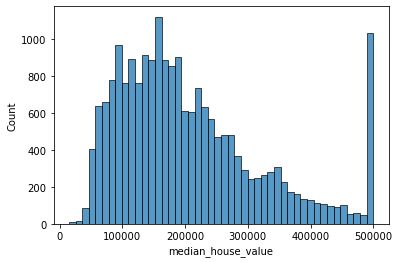

In [11]:
#Look at the median_house_value variable. Does it have a long tail?
sns.histplot(df.median_house_value)

In [12]:
#from histogram we can assume that the data "median_house_value" 
#has head and body with short to no tail with the spike at the end
#Resource:"How to Tame the Long Tail in Machine Learning" 
#available at: https://scale.com/blog/taming-long-tail

In [13]:
#For the rest of the homework we don't need the column 'ocean_proximity'
df_hw2 = df.drop(columns=['ocean_proximity']).copy()
print(df_hw2.shape)
df_hw2.head()
#Resource: "Pandas .drop"
#at:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 

(20640, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [14]:
#or we can do the same with making a copy of necessary columns into the new df
df_hw2_copy=df[['latitude',
                'longitude',
                'housing_median_age',
                'total_rooms',
                'total_bedrooms',
                'population',
                'households',
                'median_income',
                'median_house_value']].copy()
print(df_hw2_copy.shape)
df_hw2_copy.head()

(20640, 9)


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Question 1

In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
df_hw2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

In [17]:
df_hw2['population'].median()

1166.0

### Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [18]:
train, validate, test = np.split(df_hw2.sample(frac=1, random_state=42), 
                       [int(.6*len(df_hw2)), int(.8*len(df_hw2))])

print(train.shape, validate.shape, test.shape)
train.head()

(12384, 9) (4128, 9) (4128, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [19]:
#reset and drop index
train = train.reset_index(drop=True)
validate = validate.reset_index(drop=True)
test = test.reset_index(drop=True)

print(train.shape, validate.shape, test.shape)
train.head()

(12384, 9) (4128, 9) (4128, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [20]:
#Make sure that the target value ('median_house_value') is not in your dataframe.
#Copy at the end can be removed, but in that case we would need to use:
#del train['median_house_value'], del validate['median_house_value'], del test['median_house_value']
X_train = train.drop(columns=['median_house_value']).copy()
X_val = validate.drop(columns=['median_house_value']).copy()
X_test = test.drop(columns=['median_house_value']).copy()

print(X_train.shape, X_val.shape, X_test.shape)
X_train.head()

(12384, 8) (4128, 8) (4128, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [21]:
#Apply the log transformation to the median_house_value variable
#using the np.log1p() function.

y_train = np.log1p(train.median_house_value)
y_val = np.log1p(validate.median_house_value)
y_test = np.log1p(test.median_house_value)

print(len(y_train), len(y_val), len(y_test))
y_train

12384 4128 4128


0        10.772708
1        10.732061
2        13.122367
3        12.295003
4        12.535380
           ...    
12379    13.041806
12380    12.234665
12381    11.896833
12382    11.930326
12383    12.948726
Name: median_house_value, Length: 12384, dtype: float64

# Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE? <br>
<br>
Options:<br>
<br>
- With 0
- With mean
- With median
- Both are equally good

### Linear Regression

$$\hat y = w_0 + \sum_i w_i x_i $$
$w_0$ is the offset and $w_i$ defines the slope for the ith input (weight for each input).

## Replace NaN in 'total_bedrooms' with 0

In [22]:
#As alternative we could use pandas X_train.fillna(0)... for the whole dataset

X_train['total_bedrooms'] = X_train['total_bedrooms'].replace(np.nan, 0)
X_val['total_bedrooms'] = X_val['total_bedrooms'].replace(np.nan, 0)
X_test['total_bedrooms'] = X_test['total_bedrooms'].replace(np.nan, 0)

X_train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [23]:
X_train = X_train.values
X_val = X_val.values
X_test = X_test.values
X_train[:10]

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01,  1.5050e+03,  0.0000e+00,
         1.3920e+03,  3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01,  2.9430e+03,  0.0000e+00,
         1.5650e+03,  5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01,  3.8300e+03,  0.0000e+00,
         1.3100e+03,  9.6300e+02,  3.4801e+00],
       [-1.1872e+02,  3.4280e+01,  1.7000e+01,  3.0510e+03,  0.0000e+00,
         1.7050e+03,  4.9500e+02,  5.7376e+00],
       [-1.2193e+02,  3.6620e+01,  3.4000e+01,  2.3510e+03,  0.0000e+00,
         1.0630e+03,  4.2800e+02,  3.7250e+00],
       [-1.1761e+02,  3.4080e+01,  1.2000e+01,  4.4270e+03,  0.0000e+00,
         2.4000e+03,  8.4300e+02,  4.7147e+00],
       [-1.1802e+02,  3.3890e+01,  3.6000e+01,  1.3750e+03,  0.0000e+00,
         6.7000e+02,  2.2100e+02,  5.0839e+00],
       [-1.1808e+02,  3.3920e+01,  3.8000e+01,  1.3350e+03,  0.0000e+00,
         1.0110e+03,  2.6900e+02,  3.6908e+00],
       [-1.2208e+02,  3.7390e+01

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [25]:
w_0, w = train_linear_regression(X_train, y_train)

In [26]:
y_pred = w_0 + X_train.dot(w)

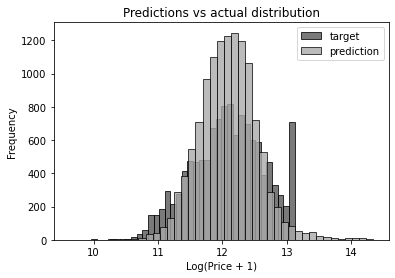

In [27]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [28]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [29]:
rmse(y_train, y_pred)

0.341313591015668

In [30]:
y_pred = w_0 + X_val.dot(w)
score_0_val = rmse(y_val, y_pred)
print(round(score_0_val, 2))

0.33


## Replace NaN in 'total_bedrooms' with mean

In [31]:
X_train_mean = train.drop(columns=['median_house_value']).copy()
X_val_mean = validate.drop(columns=['median_house_value']).copy()
X_test_mean = test.drop(columns=['median_house_value']).copy()

print(X_train_mean.shape, X_val_mean.shape, X_test_mean.shape)
X_train_mean.head()

(12384, 8) (4128, 8) (4128, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [32]:
bedrooms_mean = X_train_mean['total_bedrooms'].mean()
print(bedrooms_mean)

X_train_mean['total_bedrooms'] = X_train_mean['total_bedrooms'].replace(np.nan, bedrooms_mean)
X_val_mean['total_bedrooms'] = X_val_mean['total_bedrooms'].replace(np.nan, bedrooms_mean)
X_test_mean['total_bedrooms'] = X_test_mean['total_bedrooms'].replace(np.nan, bedrooms_mean)

X_train_mean.isnull().sum()

533.4803317730147


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [33]:
X_train_mean = X_train_mean.values
X_val_mean = X_val_mean.values
X_test_mean = X_test_mean.values

X_train_mean[:3]

array([[-1.19010000e+02,  3.60600000e+01,  2.50000000e+01,
         1.50500000e+03,  5.33480332e+02,  1.39200000e+03,
         3.59000000e+02,  1.68120000e+00],
       [-1.19460000e+02,  3.51400000e+01,  3.00000000e+01,
         2.94300000e+03,  5.33480332e+02,  1.56500000e+03,
         5.84000000e+02,  2.53130000e+00],
       [-1.22440000e+02,  3.78000000e+01,  5.20000000e+01,
         3.83000000e+03,  5.33480332e+02,  1.31000000e+03,
         9.63000000e+02,  3.48010000e+00]])

In [34]:
w_0, w = train_linear_regression(X_train_mean, y_train)

In [35]:
y_pred = w_0 + X_train_mean.dot(w)

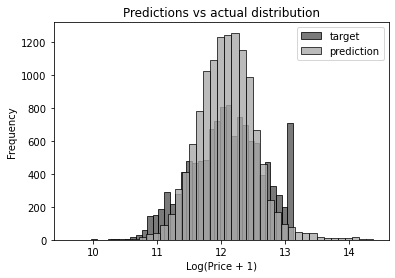

In [36]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [37]:
rmse(y_train, y_pred)

0.34104161810328126

In [38]:
y_pred = w_0 + X_val_mean.dot(w)
score_mean_val = rmse(y_val, y_pred)
print(round(score_mean_val, 2))

0.33


## Replace NaN in 'total_bedrooms' with median

In [39]:
X_train_med = train.drop(columns=['median_house_value']).copy()
X_val_med = validate.drop(columns=['median_house_value']).copy()
X_test_med = test.drop(columns=['median_house_value']).copy()

print(X_train_med.shape, X_val_med.shape, X_test_med.shape)
X_train_med.head()

(12384, 8) (4128, 8) (4128, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [40]:
bedrooms_med = X_train_med['total_bedrooms'].median()
print(bedrooms_med)

X_train_med['total_bedrooms'] = X_train_med['total_bedrooms'].replace(np.nan, bedrooms_med)
X_val_med['total_bedrooms'] = X_val_med['total_bedrooms'].replace(np.nan, bedrooms_med)
X_test_med['total_bedrooms'] = X_test_med['total_bedrooms'].replace(np.nan, bedrooms_med)

X_train_med.isnull().sum()

431.0


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [41]:
X_train_med = X_train_med.values
X_val_med = X_val_med.values
X_test_med = X_test_med.values

X_train_med[:3]

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01,  1.5050e+03,  4.3100e+02,
         1.3920e+03,  3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01,  2.9430e+03,  4.3100e+02,
         1.5650e+03,  5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01,  3.8300e+03,  4.3100e+02,
         1.3100e+03,  9.6300e+02,  3.4801e+00]])

In [42]:
w_0, w = train_linear_regression(X_train_med, y_train)

In [43]:
y_pred = w_0 + X_train_med.dot(w)

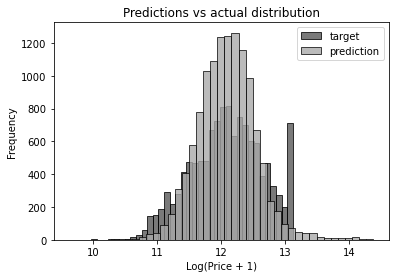

In [44]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [45]:
rmse(y_train, y_pred)

0.3410609087581674

In [46]:
y_pred = w_0 + X_val_med.dot(w)
score_med_val = rmse(y_val, y_pred)
print(round(score_med_val, 2))

0.33


# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?<br>
If there are multiple options, select the smallest r.

In [47]:
def prepare_X(df=df_hw2, replace_nan=0, rand_seed=42):
    df=df.copy()
    
    #Create train, validate, test datasets
    train, validate, test = np.split(df_hw2.sample(frac=1, random_state=rand_seed), 
                       [int(.6*len(df_hw2)), int(.8*len(df_hw2))])
    
    #reset and drop index
    train = train.reset_index(drop=True)
    validate = validate.reset_index(drop=True)
    test = test.reset_index(drop=True)
    
    #drop y
    X_train = train.drop(columns=['median_house_value']).copy()
    X_val = validate.drop(columns=['median_house_value']).copy()
    X_test = test.drop(columns=['median_house_value']).copy()
    
    #Replace NaN
    X_train['total_bedrooms'] = X_train['total_bedrooms'].replace(np.nan, replace_nan)
    X_val['total_bedrooms'] = X_val['total_bedrooms'].replace(np.nan, replace_nan)
    X_test['total_bedrooms'] = X_test['total_bedrooms'].replace(np.nan, replace_nan)
    
    #Transform into the matrix
    X_train = X_train.values
    X_val = X_val.values
    X_test = X_test.values
    
    return X_train, X_val, X_test

In [49]:
X_train, X_val, X_test = prepare_X()

In [50]:
def train_linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [59]:
for r in  [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    
    y_pred_val = w_0 + X_val.dot(w)
    
    print('r = %5s, w_0 = %.2f, train rmse:  %.2f, val rmse: %.2f' % (r, w_0, rmse(y_train, y_pred), rmse(y_val, y_pred_val)))

r =     0, w_0 = -11.69, train rmse:  0.34, val rmse: 0.33
r = 1e-06, w_0 = -11.69, train rmse:  0.34, val rmse: 0.33
r = 0.0001, w_0 = -11.69, train rmse:  0.34, val rmse: 0.33
r = 0.001, w_0 = -11.67, train rmse:  0.34, val rmse: 0.33
r =  0.01, w_0 = -11.53, train rmse:  0.34, val rmse: 0.33
r =   0.1, w_0 = -10.27, train rmse:  0.34, val rmse: 0.33
r =     1, w_0 = -4.92, train rmse:  0.35, val rmse: 0.33
r =     5, w_0 = -1.48, train rmse:  0.35, val rmse: 0.34
r =    10, w_0 = -0.79, train rmse:  0.35, val rmse: 0.34


# Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))<br>
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.
<br><br>
Options:<br>
<br>
- 0.16
- 0.00005
- 0.005
- 0.15555

In [76]:
def prepare_X_and_y(rand_seed=42, replace_nan=0, df=df_hw2):
    df=df.copy()
    print(df.shape, replace_nan, rand_seed)
    
    #Create train, validate, test datasets
    train, validate, test = np.split(df_hw2.sample(frac=1, random_state=rand_seed), 
                       [int(.6*len(df_hw2)), int(.8*len(df_hw2))])
    
    #reset and drop index
    train = train.reset_index(drop=True)
    validate = validate.reset_index(drop=True)
    test = test.reset_index(drop=True)
    
    #prepare y
    y_train = np.log1p(train.median_house_value)
    y_val = np.log1p(validate.median_house_value)
    y_test = np.log1p(test.median_house_value)
    
    #drop y
    X_train = train.drop(columns=['median_house_value']).copy()
    X_val = validate.drop(columns=['median_house_value']).copy()
    X_test = test.drop(columns=['median_house_value']).copy()
    
    #Replace NaN
    X_train['total_bedrooms'] = X_train['total_bedrooms'].replace(np.nan, replace_nan)
    X_val['total_bedrooms'] = X_val['total_bedrooms'].replace(np.nan, replace_nan)
    X_test['total_bedrooms'] = X_test['total_bedrooms'].replace(np.nan, replace_nan)
    
    #Transform into the matrix
    X_train = X_train.values
    X_val = X_val.values
    X_test = X_test.values
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [78]:
rmse_score=[]

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    X_train, y_train, X_val, y_val, X_test, y_test = prepare_X_and_y(r)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    
    y_pred_val = w_0 + X_val.dot(w)
    rmse_score.append(round(rmse(y_val, y_pred_val),3))
    print('r = %5s, w_0 = %.2f, train rmse:  %.3f, val rmse: %.3f' % (r, w_0, rmse(y_train, y_pred), rmse(y_val, y_pred_val)))

(20640, 9) 0 0
r =     0, w_0 = -11.90, train rmse:  0.343, val rmse: 0.339
(20640, 9) 0 1
r =     1, w_0 = -11.73, train rmse:  0.343, val rmse: 0.336
(20640, 9) 0 2
r =     2, w_0 = -11.81, train rmse:  0.341, val rmse: 0.332
(20640, 9) 0 3
r =     3, w_0 = -11.59, train rmse:  0.342, val rmse: 0.341
(20640, 9) 0 4
r =     4, w_0 = -11.39, train rmse:  0.343, val rmse: 0.339
(20640, 9) 0 5
r =     5, w_0 = -11.45, train rmse:  0.342, val rmse: 0.343
(20640, 9) 0 6
r =     6, w_0 = -11.37, train rmse:  0.339, val rmse: 0.345
(20640, 9) 0 7
r =     7, w_0 = -12.47, train rmse:  0.340, val rmse: 0.340
(20640, 9) 0 8
r =     8, w_0 = -11.80, train rmse:  0.337, val rmse: 0.347
(20640, 9) 0 9
r =     9, w_0 = -11.46, train rmse:  0.341, val rmse: 0.337


In [79]:
print(round(np.std(rmse_score),3))

0.004


# Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?<br>
Options:<br>
<br>
- 0.35
- 0.135
- 0.450
- 0.245

In [87]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_X_and_y(9)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(20640, 9) 0 9
(12384, 8) (12384,) (4128, 8) (4128,) (4128, 8) (4128,)


In [88]:
X_train = np.concatenate((X_train,X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(16512, 8) (16512,) (4128, 8) (4128,) (4128, 8) (4128,)


In [90]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_train.dot(w)


In [93]:
y_pred_test = w_0 + X_test.dot(w)
print(round(rmse(y_test,y_pred_test), 3))

0.345
